### Word Embedding Algorithms: word2vec and GloVe

In [ ]:
import gensim
import numpy as np

In [ ]:
from gensim.models import Word2Vec

In [ ]:
# define training data
sentences = [['During the middle of the summer season, a holiday period is called summer vacations'],
             ['All the colleges and schools become closed due to high temperature during the summer months'],
             [ 'The kids relax and enjoy this time of the years as they do not have to go to school or colleges'],
    ['Some kids choose to stay at home and join hobby classes or learn new skills'],
    ['Most kids visit their native village to have fun with cousins, and friends']
]
# split sentences into lists of words
wds=[]
for sent in sentences:
    words=[w for w in sent[0].split()]
    wds.append(words)

In [ ]:
!pip3 install --upgrade gensim

Requirement already up-to-date: gensim in /usr/local/lib/python3.9/site-packages (4.0.1)


In [ ]:
# train model
model = Word2Vec(wds, min_count=1, sg=1)

In [ ]:
model

In [ ]:
print(model)
words=list(model.wv.index_to_key)

Word2Vec<vocab=59, vector_size=100, alpha=0.025>


In [ ]:
print(model.wv['have'])

[-9.5571382e-03  8.9382557e-03  4.1590226e-03  9.2404699e-03
  6.6439984e-03  2.9066231e-03  9.8109208e-03 -4.3981709e-03
 -6.8021477e-03  4.1841683e-03  3.7545369e-03 -5.6850398e-03
  9.6979998e-03 -3.5531071e-03  9.5785893e-03  8.5818459e-04
 -6.3149207e-03 -1.9214000e-03 -7.3964112e-03 -3.0094360e-03
  1.0576661e-03  9.4698397e-03  9.3977368e-03 -6.6645076e-03
  3.4949647e-03  2.2709956e-03 -2.4561239e-03 -9.2150401e-03
  9.9691318e-04 -8.1507489e-03  6.3484316e-03 -5.8388612e-03
  5.5817720e-03  9.7649228e-03 -1.1981803e-04  4.4945669e-03
 -1.8317085e-03  7.3508588e-03  3.9276979e-03 -9.0277959e-03
 -2.3898799e-03  3.6082324e-03 -1.0718931e-04 -1.1809218e-03
 -1.0002898e-03 -1.6811412e-03  5.8606727e-04  4.1418285e-03
 -4.1855881e-03 -3.8074898e-03 -4.8784750e-05  2.0480563e-04
 -1.8270391e-04 -4.8198807e-03  4.3133851e-03 -2.1278679e-03
  2.1021729e-03  6.8014610e-04  5.9305951e-03 -6.8186983e-03
 -6.8192314e-03 -4.4590491e-03  9.4448971e-03 -1.5417023e-03
 -9.4389832e-03 -4.38157

In [ ]:
model.save('model.bin')
new_model=Word2Vec.load('model.bin')
print(new_model)

Word2Vec<vocab=59, vector_size=100, alpha=0.025>


### PCA visualization of word vectors

In [ ]:
from sklearn.decomposition import PCA

X = model.wv.vectors
pca=PCA(n_components=2)
result=pca.fit_transform(X)


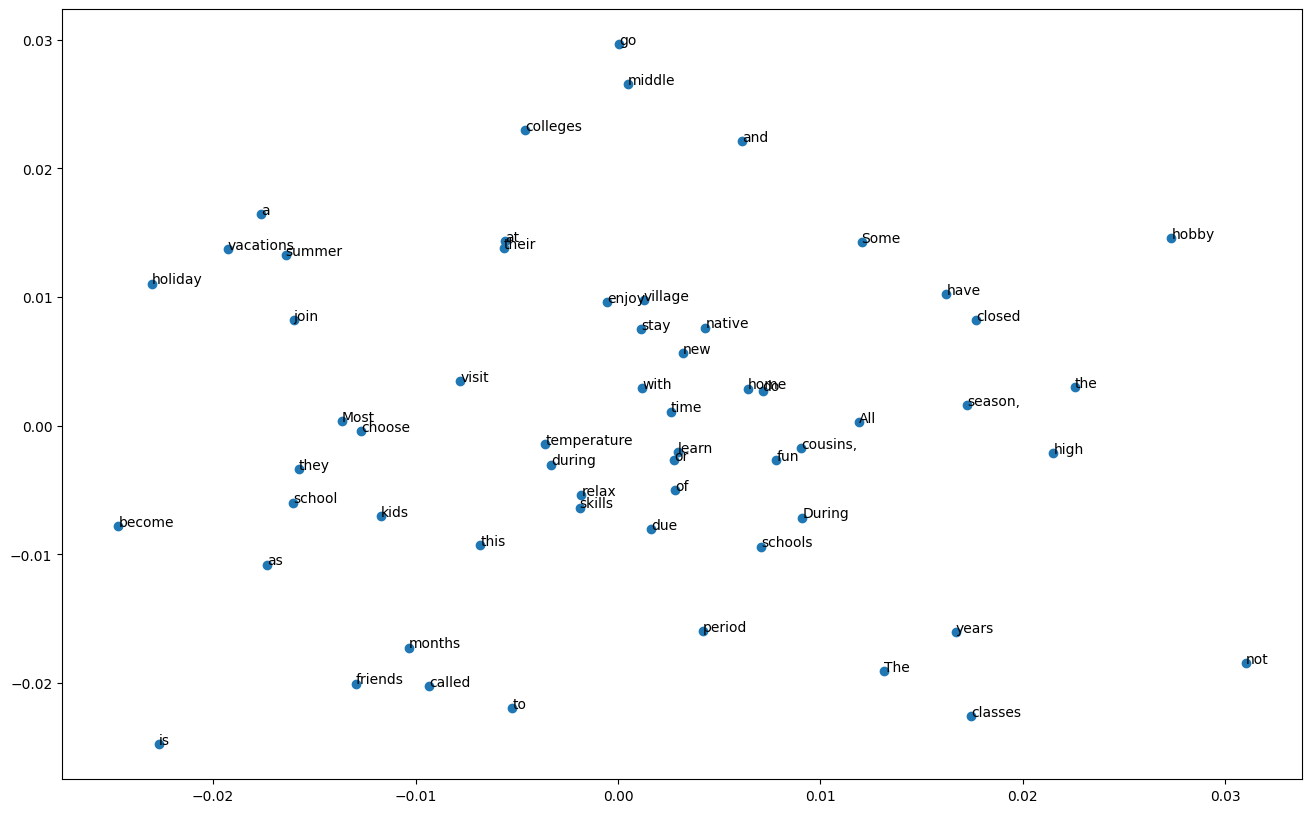

In [ ]:
from matplotlib import pyplot


pyplot.figure(figsize=(16,10))
pyplot.scatter(result[:,0],result[:,1])
words = list(model.wv.index_to_key)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

### GloVe pretrained model

In [ ]:
# Let's load a pretrained model consisting of 50-dimensional vectors of 400,000 words (trained with 6 billion tokens)
import os
from gensim.scripts.glove2word2vec import glove2word2vec


glove_input_file = 'glove.6B.50d.txt'
word2vec_output_file = 'glove6B.50d.txt.word2vec'
# convert glove file to word2vec format
glove2word2vec(glove_input_file, word2vec_output_file)


<ipython-input-12-98c1b39e76f4>:9: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


FileNotFoundError: [Errno 2] No such file or directory: 'glove.6B.50d.txt'

### Arithmetic operations with words

In [ ]:
# Running the example loads the GloVe model and then calculates the (king – man) + woman = ? operation on the word vectors
# for those words.
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = word2vec_output_file
model = KeyedVectors.load_word2vec_format(filename, binary=False)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.8523604869842529)]


In [ ]:
# calculate: (animal + farm)
result2 = model.most_similar(positive=['animal', 'farm'], topn=5)
result2

[('livestock', 0.8302522897720337),
 ('cattle', 0.8122812509536743),
 ('animals', 0.7963835597038269),
 ('farms', 0.7954063415527344),
 ('farming', 0.7766838669776917)]